In [26]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts


# Analysis 


* Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock.

In [27]:
# Extracting the path
home_rental_path = "../Data/Housing_Price/Median_List_Price_monthly.csv"

In [28]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
# real_estate_data = pd.read_csv(real_estate_path)
home_rental_data = pd.read_csv(home_rental_path)
home_rental_data

# original dataframe has 914 rows × 75 columns

,RegionID,RegionName,StateName,SizeRank,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
0,102001,United States,NaN,0,1458,1464,1469,1475,1481,1487,...,1744,1745,1745,1746,1746,1747,1747,1747,1747.0,1748.0
1,394913,"New York, NY",NY,1,2518,2527,2537,2546,2555,2564,...,2756,2734,2713,2691,2669,2646,2624,2600,2576.0,2552.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,2,2024,2036,2047,2059,2071,2083,...,2566,2565,2564,2563,2561,2559,2558,2556,2554.0,2553.0
3,394463,"Chicago, IL",IL,3,1573,1577,1581,1584,1589,1593,...,1766,1762,1758,1754,1750,1746,1742,1737,1732.0,1728.0
4,394514,"Dallas-Fort Worth, TX",TX,4,1285,1291,1297,1303,1308,1313,...,1566,1568,1571,1573,1575,1577,1580,1582,1585.0,1587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,394995,"Port St. Lucie, FL",FL,119,1286,1292,1297,1303,1308,1314,...,1721,1732,1742,1753,1763,1773,1784,1794,1804.0,1815.0
102,394602,"Fort Collins, CO",CO,159,1342,1350,1359,1367,1374,1381,...,1588,1592,1595,1598,1601,1604,1608,1611,1614.0,1618.0
103,394405,"Boulder, CO",CO,162,1647,1658,1670,1681,1693,1704,...,1991,1994,1997,2000,2003,2007,2010,2013,2017.0,2020.0
104,394645,"Greeley, CO",CO,177,1314,1323,1333,1342,1349,1356,...,1643,1647,1651,1656,1660,1664,1668,1673,1677.0,1681.0


In [29]:
# split city from state, make a new column with just city
home_rental_data["RegionName"] = home_rental_data["RegionName"].str.split(",").str[0]
home_rental_data

,RegionID,RegionName,StateName,SizeRank,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
0,102001,United States,NaN,0,1458,1464,1469,1475,1481,1487,...,1744,1745,1745,1746,1746,1747,1747,1747,1747.0,1748.0
1,394913,New York,NY,1,2518,2527,2537,2546,2555,2564,...,2756,2734,2713,2691,2669,2646,2624,2600,2576.0,2552.0
2,753899,Los Angeles-Long Beach-Anaheim,CA,2,2024,2036,2047,2059,2071,2083,...,2566,2565,2564,2563,2561,2559,2558,2556,2554.0,2553.0
3,394463,Chicago,IL,3,1573,1577,1581,1584,1589,1593,...,1766,1762,1758,1754,1750,1746,1742,1737,1732.0,1728.0
4,394514,Dallas-Fort Worth,TX,4,1285,1291,1297,1303,1308,1313,...,1566,1568,1571,1573,1575,1577,1580,1582,1585.0,1587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,394995,Port St. Lucie,FL,119,1286,1292,1297,1303,1308,1314,...,1721,1732,1742,1753,1763,1773,1784,1794,1804.0,1815.0
102,394602,Fort Collins,CO,159,1342,1350,1359,1367,1374,1381,...,1588,1592,1595,1598,1601,1604,1608,1611,1614.0,1618.0
103,394405,Boulder,CO,162,1647,1658,1670,1681,1693,1704,...,1991,1994,1997,2000,2003,2007,2010,2013,2017.0,2020.0
104,394645,Greeley,CO,177,1314,1323,1333,1342,1349,1356,...,1643,1647,1651,1656,1660,1664,1668,1673,1677.0,1681.0


In [33]:
home_rental_data = home_rental_data.dropna(how="any")
home_rental_data.head()

,RegionID,RegionName,StateName,SizeRank,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
1,394913,New York,NY,1,2518,2527,2537,2546,2555,2564,...,2756,2734,2713,2691,2669,2646,2624,2600,2576.0,2552.0
2,753899,Los Angeles-Long Beach-Anaheim,CA,2,2024,2036,2047,2059,2071,2083,...,2566,2565,2564,2563,2561,2559,2558,2556,2554.0,2553.0
3,394463,Chicago,IL,3,1573,1577,1581,1584,1589,1593,...,1766,1762,1758,1754,1750,1746,1742,1737,1732.0,1728.0
4,394514,Dallas-Fort Worth,TX,4,1285,1291,1297,1303,1308,1313,...,1566,1568,1571,1573,1575,1577,1580,1582,1585.0,1587.0
5,394974,Philadelphia,PA,5,1389,1392,1396,1399,1402,1406,...,1604,1606,1608,1610,1613,1615,1617,1619,1622.0,1624.0


In [35]:
# Creating a list 
rental_date = []
column_names = ["RegionID", "RegionName", "StateName", "SizeRank"]
for x in home_rental_data.columns:
    if x not in column_names:
        rental_date.append(x)

In [36]:
rental_summary_df = []
for i, row in home_rental_data .iterrows():
    region_id = row["RegionID"]
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    for x in rental_date:
        dat = x.split("-")
        a ={
            "Region ID": region_id,
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Date": f"{dat[1].rjust(2,'0')}-{dat[0]}",
            "Year": dat[0],
            "Month": dat[1],
            "Rental Price":row[x]
        }
        rental_summary_df.append(a)
        


In [37]:
# creating the new dataframe for easy viewing 
new_rental_df = pd.DataFrame(rental_summary_df)
new_rental_df

,Region ID,Region Name,State Name,Size Rank,Date,Year,Month,Rental Price
0,394913,New York,NY,1,01-2015,2015,01,2518.0
1,394913,New York,NY,1,02-2015,2015,02,2527.0
2,394913,New York,NY,1,03-2015,2015,03,2537.0
3,394913,New York,NY,1,04-2015,2015,04,2546.0
4,394913,New York,NY,1,05-2015,2015,05,2555.0
...,...,...,...,...,...,...,...,...
7368,394623,Gainesville,GA,229,09-2020,2020,09,1426.0
7369,394623,Gainesville,GA,229,10-2020,2020,10,1432.0
7370,394623,Gainesville,GA,229,11-2020,2020,11,1440.0
7371,394623,Gainesville,GA,229,12-2020,2020,12,1447.0


In [42]:
rent_summary = new_rental_df.groupby("State Name").describe()["Rental Price"]
rent_summary 

,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AL,73.0,1067.986301,53.727578,994.0,1023.00,1055.0,1111.00,1186.0
AR,73.0,878.794521,32.713384,836.0,853.00,870.0,899.00,959.0
AZ,73.0,1280.657534,144.144046,1063.0,1163.00,1251.0,1404.00,1559.0
CA,657.0,2106.091324,648.856887,1063.0,1513.00,2115.0,2641.00,3232.0
CO,365.0,1577.517808,200.492396,1137.0,1439.00,1563.0,1715.00,2020.0
CT,219.0,1569.004566,341.117141,1210.0,1304.00,1386.0,1964.50,2240.0
DC,73.0,2041.109589,62.344153,1932.0,1989.00,2035.0,2099.00,2134.0
FL,730.0,1452.993151,217.975877,1063.0,1290.00,1426.0,1609.75,1942.0
GA,219.0,1231.570776,184.321738,962.0,1067.00,1214.0,1375.00,1627.0


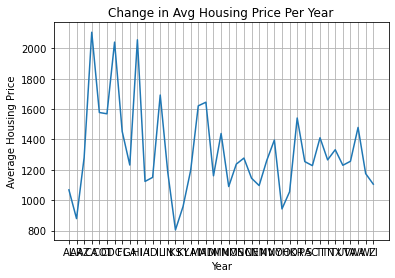

In [44]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(rent_summary.index.values, rent_summary ["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Change in Avg Housing Price Per Year")

# plt.xlim(-0.75, len(RE_groupby_year.index.values))
# plt.ylim(145000, max(RE_groupby_year["mean"])+50)

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020
# add x-lim and y- lim


In [ ]:
# looking at relationship of how much the max. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["max"]/1000)

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Max. Housing Price Price (x 1,000)")
plt.title("The changes in premium housing price per year")


plt.grid()
plt.show()


In [ ]:
# RE_groupby_year["max"]/10000

In [ ]:
# looking at relationship of how much the min. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["min"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Min. Housing Price Price")
plt.title("The changes in more affordable housing price per year")


plt.grid()
plt.show()


In [ ]:
# grouping the housing price by state
RE_groupby_state = no_duplicate_RE_df.groupby(["State Name", "Year"]).describe()["Housing Price"]
# RE_groupby_state.head()

In [ ]:
# looking at the median housing price
RE_groupby_state_median = RE_groupby_state["50%"]
# RE_groupby_state_median.head()


In [ ]:
state_year_min_max = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].agg(["min", "max"])
# state_year_min_max
# state_year_median = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].median()
# state_year_median




In [ ]:
state_year_min_max_2 = state_year_min_max.reset_index()
state_year_min_max_2.sort_values(["State Name", "max"], inplace=True)
state_year_min_max_2.groupby(["State Name", "Year"]).last()

In [ ]:
state_year_min_max2 = state_year_min_max.copy().reset_index()
ls = {}
for i, row in state_year_min_max2.iterrows():
    if row["State Name"] not in ls:
        ls[row["State Name"]] = [10000000000, 0, "", "", 0, 0]
    if ls[row["State Name"]][0]>row["min"]:
        ls[row["State Name"]][0] =row["min"]
        ls[row["State Name"]][2] = row["City Name"]
        ls[row["State Name"]][4] = row["Year"]
    if ls[row["State Name"]][1]<row["max"]:
        ls[row["State Name"]][1] =row["max"]
        ls[row["State Name"]][3] = row["City Name"]
        ls[row["State Name"]][5] = row["Year"]
    a= 1
print(row)
# print(ls)
max_min_state_year = pd.DataFrame(ls).T
max_min_state_year.head()

In [ ]:
#renaming the columns
max_min_state_year = max_min_state_year.rename(columns={
        0: "Min. Housing Price",
        1: "Max. Housing Price",
        2: "City of Min. Housing Price",
        3: "City of Max. Housing Price",
        4: "Year of Min. Housing Price",
        5: "Year of Max. Housing Price"})

max_min_state_year.head()

In [ ]:
max_min_state_year1 = max_min_state_year[max_min_state_year.index !="Country"]
# max_min_state_year1.head()

In [ ]:
# Ploting the premium housing price and more affordable housing price of each state
max_housing_price_bar = max_min_state_year1.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price (Million $)")
plt.title("The Min. & Max housing price of each State")


In [ ]:
# Looking at the median housing price and group by state. Drop the row that said "country"
state_year_median = no_duplicate_RE_df.groupby("State Name")["Housing Price"].median()
state_year_median = state_year_median[state_year_median.index != "Country"]
# state_year_median.head()

In [ ]:
# Avg housing price of each state 
state_year_median_bar = state_year_median.plot(kind="bar", figsize=(15,5))
plt.xlabel("State Name")
plt.ylabel("Housing Price")


In [ ]:
homelessdata = "../Data/PIT_AllYearsData_Output.csv"
homeless_df = pd.read_csv(homelessdata)
homeless_df.head()

In [ ]:
#group homeless by state
homeless_df_state = homeless_df.groupby("State").mean()
# homeless_df_state.head()

In [ ]:
RE_groupby_state1 = no_duplicate_RE_df.groupby("State Name").describe()["Housing Price"]
RE_groupby_state1.head()

In [ ]:
# There's a country data in the dataframe, so I drop that from my dataframe.
RE_no_country_df1 = RE_groupby_state1[RE_groupby_state1.index !="Country"]
# RE_no_country_df1


In [ ]:
# merging two dataframe together, Real State without Country, and Homeless dataframe
joined_RE_HL = pd.merge(RE_no_country_df1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_RE_HL.head()


In [ ]:
# creating a scatter plot
x = joined_RE_HL["mean"]
y = joined_RE_HL["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")


labels = joined_RE_HL.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Housing Price Vs. Homeless Population (All Rank Size)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,80000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [ ]:
# using the homeless dataframe, remove NY and CA. First I removed NY
homeless_no_NY = homeless_df_state[homeless_df_state.index !="NY"]
# homeless_no_NY.head()

# Dropping CA from dataframe
homeless_no_CA_NY = homeless_no_NY[homeless_no_NY.index !="CA"]
# homeless_no_CA_NY.head()

# dropping CA from real estate dataframe
RE_no_CA = RE_no_country_df1[RE_no_country_df1.index !="CA"]
# RE_no_CA.head()

# dropping NY from real estate dataframe
RE_no_CA_NY = RE_no_CA[RE_no_CA.index !="NY"]
# # RE_no_CA_NY.head()

In [ ]:
# Make a merge dataframe between real estate and homeless population
joined_no_NY_CA = pd.merge(RE_no_CA_NY, homeless_no_CA_NY, how='inner', left_index= True, right_index=True)
# joined_no_NY_CA


In [ ]:
# creating a scatter plot. Plotting the avg housing price and overall homeless number
x = joined_no_NY_CA["mean"]
y = joined_no_NY_CA["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")


labels = joined_no_NY_CA.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Avg Housing $ Vs. Homeless Population (Without NY & CA - all rank size)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,25000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [ ]:
# Extracting the path
state_population = "../Data/State_Names_Sheet3.csv"

In [ ]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
state_population1 = pd.read_csv(state_population).set_index('State')
state_population1.head()

In [ ]:
# homeless_df_state

In [ ]:
joined_population_homeless = pd.merge(state_population1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_population_homeless.head()

In [ ]:
#2017/x100
joined_population_homeless["Homelessness_rate"] = joined_population_homeless["Overall Homeless"]/joined_population_homeless["Population "]*100
# joined_population_homeless["Homelessness_rate"]



In [ ]:
joined_2 = pd.merge(RE_no_country_df1, joined_population_homeless, how='inner', left_index=True, right_index=True)
joined_2.head()


In [ ]:
# plot homelessness rate vs. avg pricing 

# creating a scatter plot
x = joined_2["mean"]
y = joined_2["Homelessness_rate"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless rate is {round(correlation[0],2)}")


labels = joined_2.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Avg Housing $ Vs. Homeless rate % (all rank size)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Homelessness rate')
# plt.ylim(0, 0.6)
plt.scatter(x, y)
plt.annotate(line_eq,(400000,0.5),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()